# Project: Investigate a Dataset - TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

###### This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue.

### Question(s) for Analysis
1. Longest and shortest movies and their directors?
2. Average runtime of all movies?
3. Have movies runtime been going up or down through the years?


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

We'll start by loading the data, then have a look at its contents, then we'll check its length and shape, we'll check the datatypes of each column and relevant information.
We'll look into the usefulness of each column in our dataframe to see whether they'll be usefull in our investigation and help us answer our questions or not.

### General Properties

We'll start by loading the data using the read_csv function then viewing the first five rows of the dataset using the head function

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


After loading the data successfully we inspect its columns and rows and see what will be usefull for us, then we use the shape method to check the number of rows and columns in our dataset just to get an idea of how much data we're dealing with

In [3]:
df.shape

(10866, 21)

the columns method provides the names of columns in our dataset

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

we use the info function to get further understanding of our dataset and how every column's data behaves and their types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

the describe function is one of my favourite because it gives us an overview of the statistics of our dataset like the mean and the median etc...

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


we use the hist function to view our dataset's values distribution to try and get a better understanding of our dataset

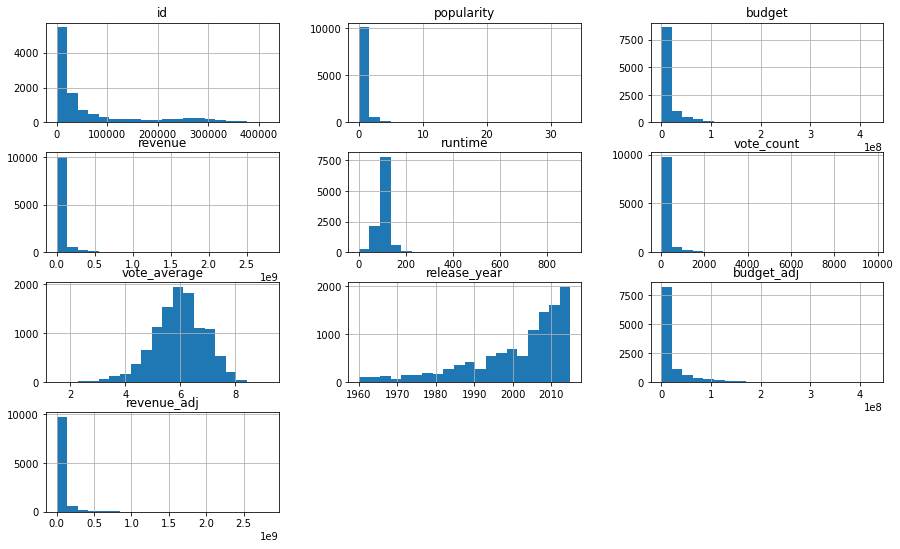

In [12]:
df.hist(figsize=(15, 9), bins=20);


### Data Cleaning

After looking at our dataset's content, everything seems okay but we'll do some adjustments, Like dropping some columns that aren't going to be used in our line of questioning.
I don't think that we're going to be using any of these columns:
`id, imdb_id, budget, popularity, revenue, cast, homepage, tagline, overview, keywords, release_date, production_companies, vote_count, budget_adj, revenue_adj`
I've also did some adjustments to the values in the genres column to make it more readable

So we use the drop function in pandas to drop these columns like this

In [23]:
df2 = df.drop(['imdb_id', 'id', 'budget', 'revenue', 
               'cast', 'homepage', 'tagline', 'overview', 
               'keywords', 'release_date', 'production_companies', 'vote_count', 
               'budget_adj', 'revenue_adj', 'popularity'], axis=1)

then we take a look at our new dataset

In [24]:
df2.head()

,original_title,director,runtime,genres,vote_average,release_year
0,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,Furious 7,James Wan,137,Action|Crime|Thriller,7.3,2015


Everything seems okay except for the genres column it has this pipe char `'|'` and it's fine to leave it like that but i think i'll go ahead and remove this pipe and keep the first genre that appears 
this will be done using the apply and lambda function which are both very powerful.

In [17]:
df2['genres'] = df2['genres'].apply(lambda x: x.split('|')[0])

then we take another look at our data

In [18]:
df2.head()

,original_title,director,runtime,genres,vote_average,release_year
0,Jurassic World,Colin Trevorrow,124,Action,6.5,2015
1,Mad Max: Fury Road,George Miller,120,Action,7.1,2015
2,Insurgent,Robert Schwentke,119,Adventure,6.3,2015
3,Star Wars: The Force Awakens,J.J. Abrams,136,Action,7.5,2015
4,Furious 7,James Wan,137,Action,7.3,2015


haaa much better!

we check the size of our new dataframe and do some plots to its content to get a further understanding of the data

In [17]:
df2.shape

(10866, 6)

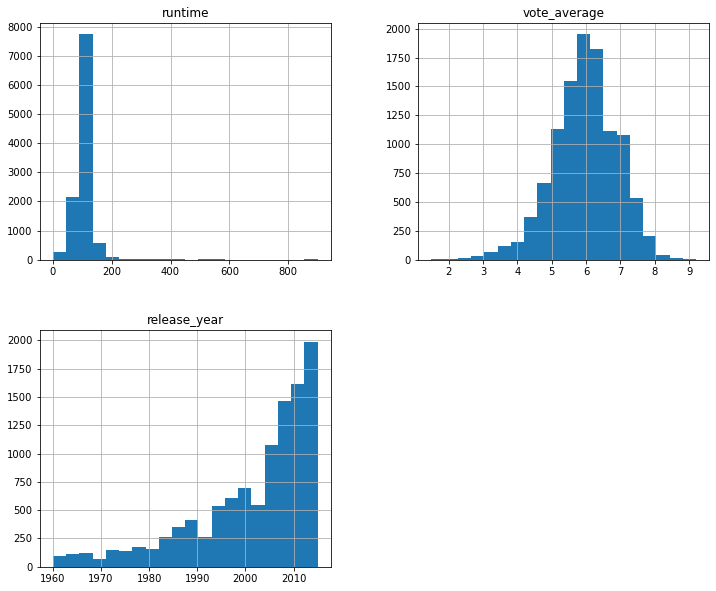

In [18]:
S

after that we use the scatter_matrix function
this method of plotting the whole dataset can be usefull because we can discover relations between factors that we didn't know about 

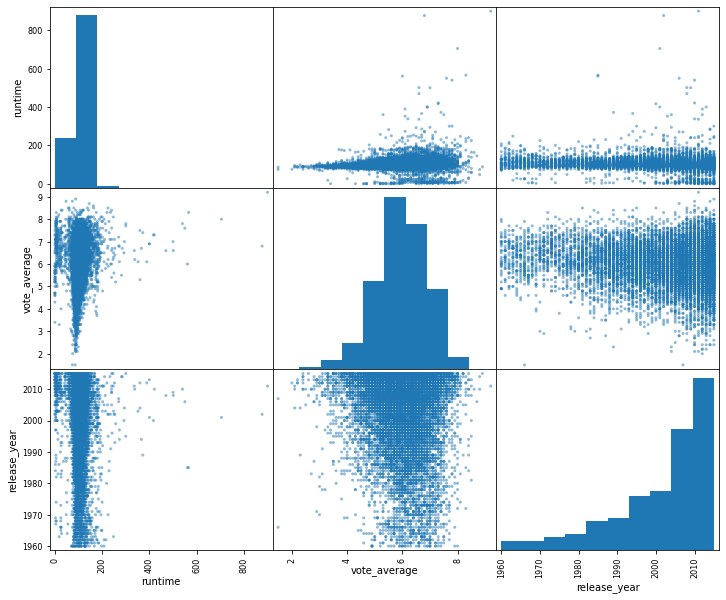

In [19]:
pd.plotting.scatter_matrix(df2, figsize=(12, 10));

Seaborn's pairplot function gives almost the same result as the scatter_matrix but with a better design and it's more concered in aesthetic in my opinion which is never a bad thing

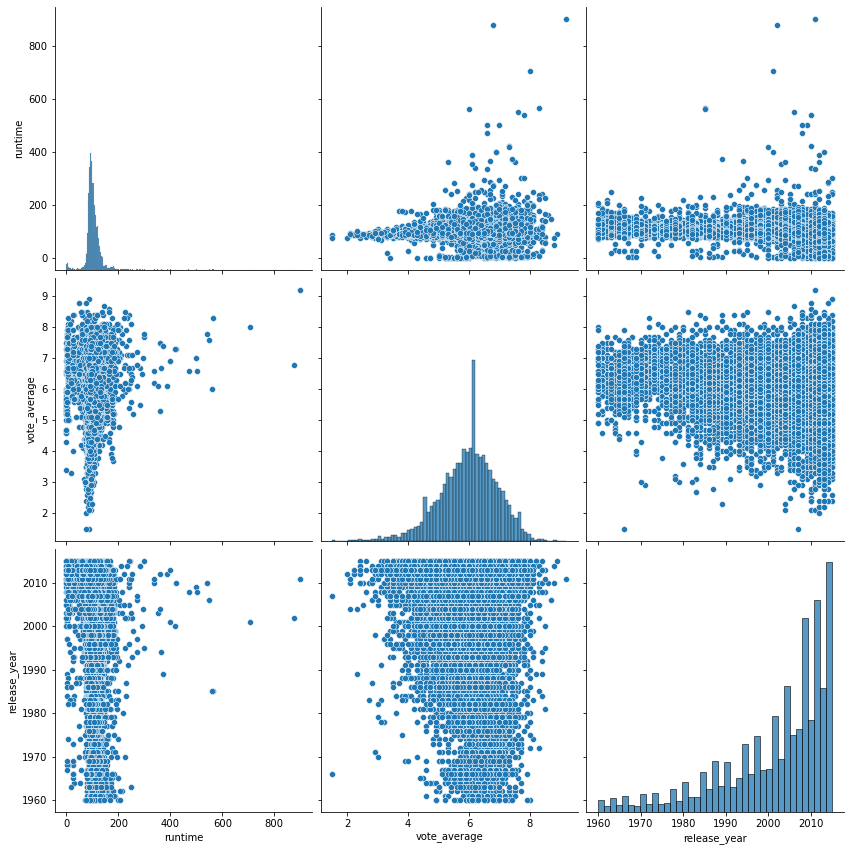

In [21]:
sns.pairplot(df2, height=4);

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10866 non-null  object 
 1   director        10822 non-null  object 
 2   runtime         10866 non-null  int64  
 3   genres          10843 non-null  object 
 4   vote_average    10866 non-null  float64
 5   release_year    10866 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 509.5+ KB


we check the data types and any relevant information about our dataframe using the info function
we find that we have some missing values in the director and genres columns which will require further investigation

In [21]:
df2.nunique()

original_title    10571
director           5068
runtime             247
genres               21
vote_average         72
release_year         56
dtype: int64

we check the number of unique values using the nunique value, then we check our missing values using isnull function followed by the sum function to get the count of missing values in each column 

In [26]:
df2.isnull().sum()

original_title     0
director          44
runtime            0
genres            23
vote_average       0
release_year       0
dtype: int64

we could drop these missing values or we could fill them with "Unknown" or "Missing-Values" i think i'll do the later so we don't lose anymore data we dropped a lot of columns already 
so i'll use the fillna method to do that, 
then i'll check again if there're any missing values just to be clear

In [16]:
df2.fillna("Missing-Values", inplace=True)

In [24]:
df2.isnull().sum()

original_title    0
director          0
runtime           0
genres            0
vote_average      0
release_year      0
dtype: int64

In [25]:
df2.describe()

,runtime,vote_average,release_year
count,10866.000000,10866.000000,10866.000000
mean,102.070863,5.974922,2001.322658
std,31.381405,0.935142,12.812941
min,0.000000,1.500000,1960.000000
25%,90.000000,5.400000,1995.000000
50%,99.000000,6.000000,2006.000000
75%,111.000000,6.600000,2011.000000
max,900.000000,9.200000,2015.000000


when we use the describe function again to get a summary statistics of our newly formed dataframe, something doesn't look right, we have a minimum value of 0 for the runtime of some movies so it'll require further investigation

In [27]:
df2[df2['runtime'] == 0].head()

,original_title,director,runtime,genres,vote_average,release_year
92,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,5.4,2015
334,Ronaldo,Anthony Wonke,0,Documentary,6.5,2015
410,Anarchy Parlor,Kenny Gage|Devon Downs,0,Horror,5.6,2015
445,The Exorcism of Molly Hartley,Steven R. Monroe,0,Horror,5.0,2015
486,If There Be Thorns,Nancy Savoca,0,TV Movie|Drama,5.4,2015


so we use a method to filter out the movies that has a runtime equal to zero, then we use the value_counts function followed by the sum function to get the exact number of movies that have zero runtime 

In [27]:
df2[df2['runtime'] == 0].value_counts().sum()

31

there are 31 movies that are missing their runtime, all were made in the 2000-2015 period which is not that far in the past and it seems weird that they're missing their duration but anyway we'll go ahead and drop them so that they wouldn't affect our analysis

there are several methods that we could do the dropping but i found this method to be the simplest, we set the index of the whole dataframe using the set_index function to the runtime column like this 

In [28]:
df2 = df2.set_index('runtime')

In [29]:
df2.head()

,original_title,director,genres,vote_average,release_year
runtime,,,,,
124,Jurassic World,Colin Trevorrow,Action,6.5,2015
120,Mad Max: Fury Road,George Miller,Action,7.1,2015
119,Insurgent,Robert Schwentke,Adventure,6.3,2015
136,Star Wars: The Force Awakens,J.J. Abrams,Action,7.5,2015
137,Furious 7,James Wan,Action,7.3,2015


then we drop all the rows that has an index of zero in this case the movies that has a runtime equal to zero 

In [30]:
df2 = df2.drop(0, axis=0)

then we reset our index again to its original form using the reset_index function

In [31]:
df2.reset_index(inplace=True)

now we run our describe function again and we find that the minimum value for the runtime of movies is now a 2 minute value which is still weird but better than a movie that has no length and it sure will require further analysis which is why we're going to explore that more in our questions 

In [32]:
df2.describe()

,runtime,vote_average,release_year
count,10835.000000,10835.000000,10835.000000
mean,102.362898,5.976253,2001.296078
std,30.946957,0.935051,12.819389
min,2.000000,1.500000,1960.000000
25%,90.000000,5.400000,1995.000000
50%,99.000000,6.000000,2006.000000
75%,112.000000,6.600000,2011.000000
max,900.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis

Now we'll start to answer one of our questions. 


### Research Question 1 (Longest and shortest movies, their ratings and directors?)

This question is a curiosity of mine actually which movie is the longest and which is the shortest, how did they do (their ratings) who were their directors and what were they thinking directing such long or short movies!
yeah this last part is outside the scope of our dataset but still it's a question that would require further research from me, maybe another time. 
now let's get back to business we use the describe function on the runtime column to get a quick view on the statistics of our column 

In [33]:
df2[['runtime']].describe()

,runtime
count,10835.000000
mean,102.362898
std,30.946957
min,2.000000
25%,90.000000
50%,99.000000
75%,112.000000
max,900.000000


we find that the minimum value or the shortest movie is 2 minutes long which is really strange. and the longest is 900 minutes which is stranger that is like 15 hours long who would sit this long? 

we filter our dataframe like we did before to find out more about these 2 minutes long movies

In [34]:
df2[df2['runtime'] == 2]

,runtime,original_title,director,genres,vote_average,release_year
4863,2,Fresh Guacamole,PES,Animation,7.9,2012
4870,2,Cousin Ben Troop Screening,Wes Anderson,Missing-Values,7.0,2012
7875,2,The Adventures of AndrÃ© and Wally B.,Alvy Ray Smith,Animation,5.3,1984
10519,2,Luxo Jr.,John Lasseter,Animation,7.3,1986
10723,2,Bambi Meets Godzilla,Marv Newland,Animation,5.6,1969


so there are 5 movies that are 2 minutes long maybe there's something wrong with our dataset and maybe not, i'm going to presume the later and continue our analysis. so we find that all of these movies' genre is Animation except for one which has a missing value.

the ratings of these short movies isn't bad actually except for two of them which are below 6 ratings which is for me the separator between good and bad but who am i to judge...
then we get the average ratings to these short movies to find that they're weren't that bad in my opinion `Above 6`

In [35]:
df2[df2['runtime'] == 2]['vote_average'].mean()

6.62

we do the same thing but this time with the longest movie which is 15 hours long and we find that it has a rating of 9.2 which is amazing. i might start watching it to see what it's about... 

In [36]:
df2[df2['runtime'] == 900]

,runtime,original_title,director,genres,vote_average,release_year
3877,900,The Story of Film: An Odyssey,Mark Cousins,Documentary,9.2,2011


### Research Question 2  (Average runtime and ratings of all movies?)

So in this we question we investigate the overall average ratings and running time of the movies and see the average runtime and ratings for each genre

we start by calulating the average (mean) of the runtime and vote_average (ratings) using the mean function.

In [37]:
df2['runtime'].mean()

102.3628980156899

In [38]:
df2['vote_average'].mean()

5.976252884171684

so the average running time of all the movies in our dataset is 102 minutes and the average ratings is almost 6 out of 10

so i have a couple of ideas about how we can check each genres runtime and ratings. we could use the groupby function to group the genres the column with runtime and vote_average columns to get their average or we could use the groupby function on each column alone then merge them back together. i think i'll do both...

In [39]:
#First groupby mentioned above which is simple and concise
grv1 = df2.groupby('genres')[['runtime', 'vote_average']].mean().reset_index()

In [40]:
#grv stands for genre, runtime, vote_average... which are the columns names
grv1.head()

,genres,runtime,vote_average
0,Action,104.312146,5.752360
1,Adventure,108.522184,6.052048
2,Animation,64.856079,6.414888
3,Comedy,97.739300,5.883355
4,Crime,108.816273,6.214436


we used the reset_index function because if we didn't it would look like this which is not bad but i like to keep a numbered index to my datasets

In [41]:
df2.groupby('genres')[['runtime', 'vote_average']].mean().head()

,runtime,vote_average
genres,,
Action,104.312146,5.752360
Adventure,108.522184,6.052048
Animation,64.856079,6.414888
Comedy,97.739300,5.883355
Crime,108.816273,6.214436


okay so the second one was to group each column from runtime and vote_average on their own with the genres column, then we use pandas merge function to merge them together to get something similar to the first method 

In [42]:
#Same technique as the first step nothing new
gen_run = df2.groupby('genres')[['runtime']].mean().reset_index()

In [43]:
#gen_run stands for genres, runtime columns
gen_run.head()

,genres,runtime
0,Action,104.312146
1,Adventure,108.522184
2,Animation,64.856079
3,Comedy,97.739300
4,Crime,108.816273


In [44]:
gen_vot = df2.groupby('genres')[['vote_average']].mean().reset_index()

In [45]:
# gen_vot stands for genres, vote_average columns
gen_vot.head()

,genres,vote_average
0,Action,5.752360
1,Adventure,6.052048
2,Animation,6.414888
3,Comedy,5.883355
4,Crime,6.214436


here we do our merge of the two dataframes that we just produced

In [46]:
# Second method
grv2 = gen_run.merge(gen_vot, on='genres', how='left')

In [47]:
# grv stands for genre, runtime, vote_average... which are the columns names
grv2.head()

,genres,runtime,vote_average
0,Action,104.312146,5.752360
1,Adventure,108.522184,6.052048
2,Animation,64.856079,6.414888
3,Comedy,97.739300,5.883355
4,Crime,108.816273,6.214436


so we wanted to check the each genre's runtime and ratings which we could clearly see in our newely made dataframe but maybe a plot would help!

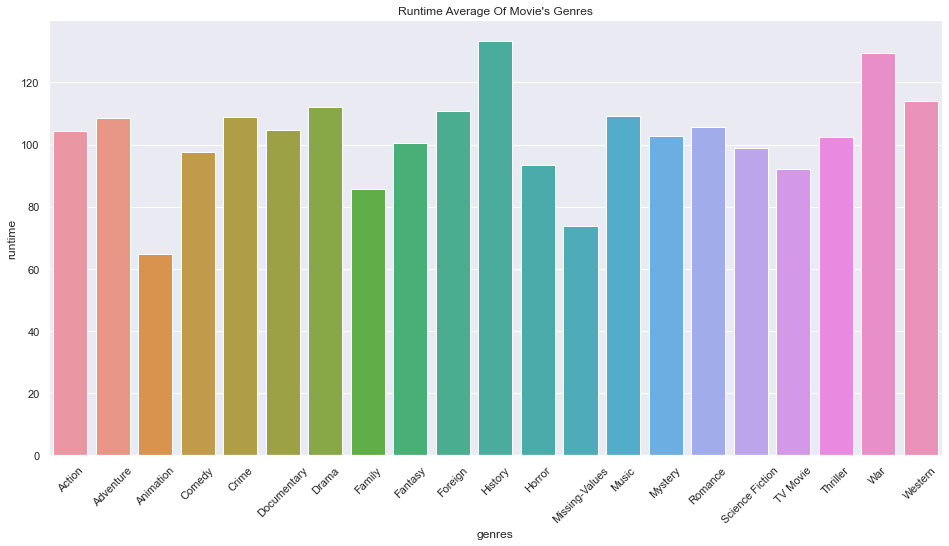

In [70]:
#sns.set to adjust the size and style of the plot 
# plt.figure(figsize=(15,8))
sns.set(rc = {'figure.figsize':(16,8)},style='darkgrid')
sns.barplot(x='genres', y='runtime', data=grv1)
plt.title("Runtime Average Of Movie's Genres")
#to adjust the rotation angles of the x-axis labels
plt.xticks(rotation=45);

so it looks like movies about war and history have have the longest average running time among other genres, with more than two hours running time.

on the other hand we have animation, family and missing-values... wait a second missing-values is not a genre for movies but yeah it's fine we did this when we used the fillna function to fill `NaN` or `null` which are missing values in general.
so they're just movies that have their genres missing maybe who ever collected the data forget about them or didn't have enough data about them anyway.. we have animation and family movies among the shortest movies.

here's another plot to how running times are distributed among genres

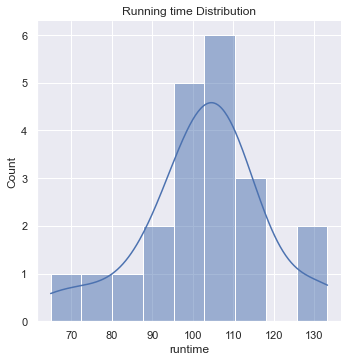

In [86]:
sns.displot(grv1['runtime'], kde=True)
plt.title("Running time Distribution");

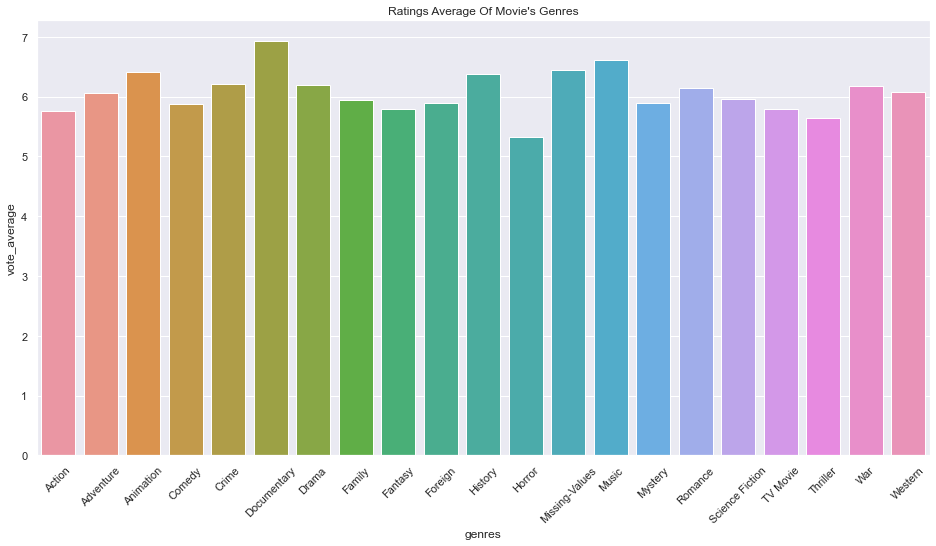

In [73]:
#sns.set to adjust the size and style of the plot 
sns.set(rc = {'figure.figsize':(16,8)})
sns.barplot(x='genres', y='vote_average', data=grv1)
plt.title("Ratings Average Of Movie's Genres")
#to adjust the rotation angles of the x-axis labels
plt.xticks(rotation=45);

all of the movies genres average ratings are between 5 and 7 with documentaries having the highest ratings and horror with the lowest

here's another plot to how ratings are distributed among genres

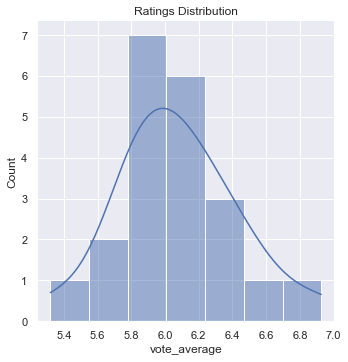

In [84]:
sns.displot(grv1['vote_average'], kde=True)
plt.title("Ratings Distribution");

### Research Question 3  (Have movies average runtime been going up or down through the years?)

so basically what we are trying to answer here is: have movies running time been any factor on the amount of ratings a movie could get!

we will start with grouping our data of ratings and running time with the release years then we'll look at our data and see if anything is brought up to our attention 

In [104]:
# rrv stands for release_year, runtime and vote_average
rrv = df2.groupby('release_year')[['runtime', 'vote_average']].mean().reset_index()

In [105]:
rrv.head()

,release_year,runtime,vote_average
0,1960,110.656250,6.325000
1,1961,119.419355,6.374194
2,1962,124.343750,6.343750
3,1963,111.323529,6.329412
4,1964,109.214286,6.211905


well, nothing best represents and describes data like graphs so we'll start by plotting a regression plot of the release years of movies with the average running time and ratings 

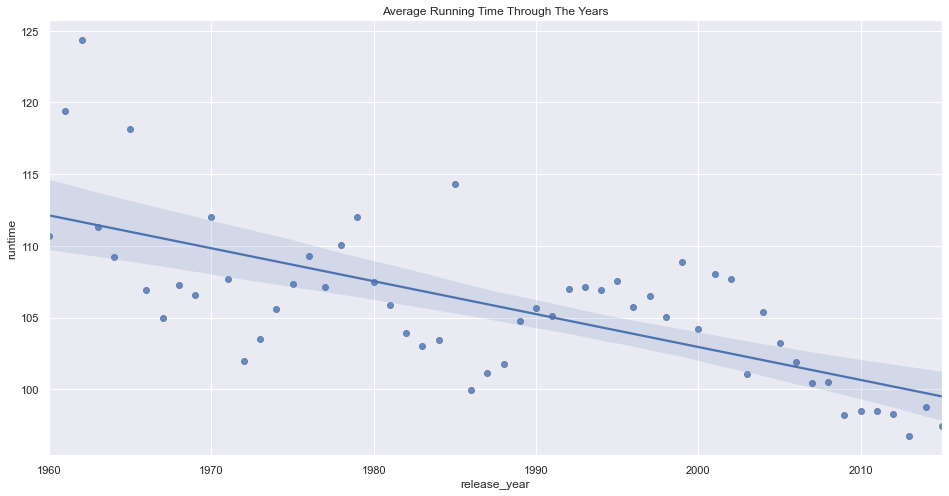

In [114]:
sns.regplot(data=rrv, x='release_year', y='runtime')
plt.title("Average Running Time Through The Years");

well there's seems to be a negative correlation between the release years and the average running time of movies which means that movies running time have been going down "Movies are getting shorter" through the years

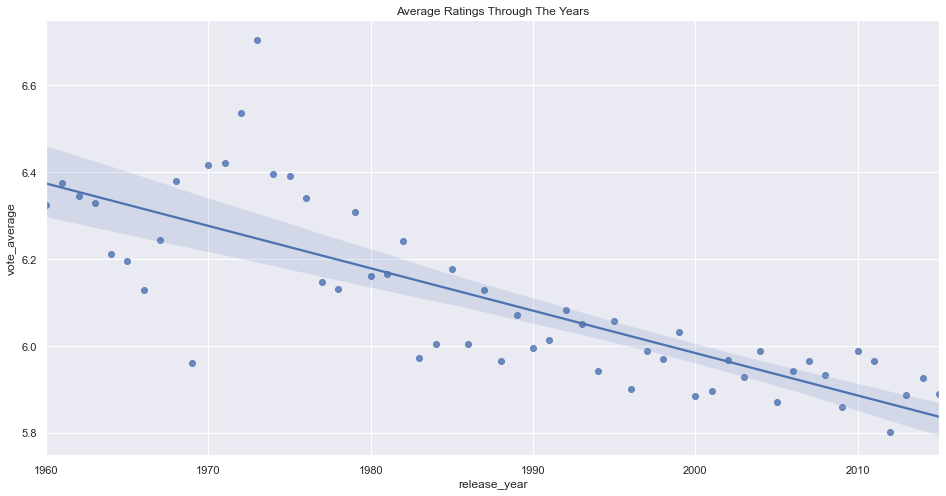

In [113]:
sns.regplot(data=rrv, x='release_year', y='vote_average')
plt.title("Average Ratings Through The Years");

same goes for ratings!

there's a postive correlation between a movie's average running time and it's ratings. which means that the longer the movie the higher ratings it gets, of course this isn't the case for all movies but the two factors correlate

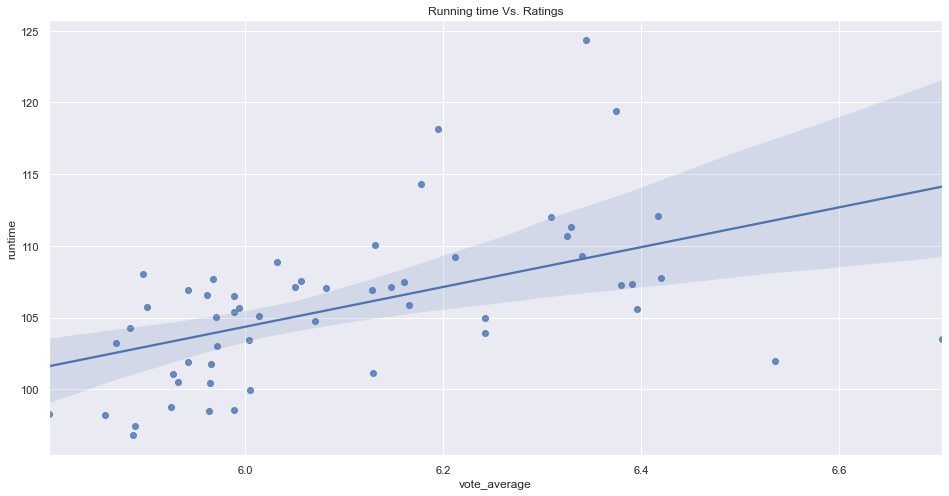

In [115]:
sns.regplot(data=rrv, x='vote_average', y='runtime')
plt.title("Running time Vs. Ratings");


# Conclusions

> Question one which was, Longest and lowest shortest movies and their directors? Had a weird answer as the shorest movie was 2 minutes long. And after further investigation we found out that there were 5 movies that were that short, I'm not sure how they're considered movies but most of the short ones are in the Animation genre and had an average rating of 6.62. 
Also the longest was 900 minutes long which is 15 hours long and it's a documentry.

> Question two which was: Average runtime and ratings of all movies? So in this question we looked into movies running and ratings and how do they correlate to the genre of each movie and we found that war and history genres have the highest average running time among other genres, while the animation and family genres had the shortest average running time. we also found that all of the movies genres average ratings are between 5 and 7 with documentaries having the hightest ratings and horror with the lowest.

>Question three which was: Have movies runtime been going up or down through the years? It clearly shows that movies average duration and ratings are going down through the years.

### Limitations

>One of the limitations to this exploratory data analysis is that movies could have multiple genres and that could have affected our findings it could have changed the findings of question two completely.

>Another one would be the missing values that we saw while working with the data it sure has its effects on our findings like we saw with question two 